<>:56: SyntaxWarning: invalid escape sequence '\o'
<>:56: SyntaxWarning: invalid escape sequence '\o'
C:\Users\niele\AppData\Local\Temp\ipykernel_956\177149122.py:56: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel('Driving frequency ($\omega_d)$')


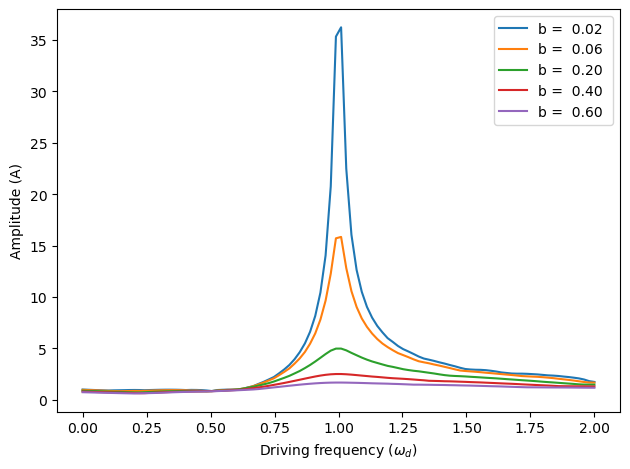

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

# Driven, damped harmonic oscillator function
def driven_pendulum(t, y, b, omega0, omega_d, A):
    x, v = y
    dxdt = v
    dvdt = -b * v - (omega0 ** 2) * x + A * np.sin(omega_d * t)
    return [dxdt, dvdt]

def double_loop(y0, t0, tf, n):
    """
    The code in this function needs to be extracted and incorporated into existing code
    """
    # define an iterable (e.g. a list, numpy array) of damping coefficients
    # (put in your 5 different values of b here where 0 < b < 1):
    damping_coefficients = [0.02, 0.06, 0.2, 0.4, 0.6]

    # define your resonant frequency
    omega = 1

    # define the driving frequencies over which your inner loop will iterate
    # I recommend using a numpy linspace.
    # Consider: why am I defining this outside the loop?  Is that OK
    driving_frequencies = np.linspace(0, omega*2, 100)


    # creates an array of the time steps
    t = np.linspace(t0, tf, n)  # Points at which output will be evaluated

    # First (outer) loop through Damping coefficients
    for b in damping_coefficients:
        amplitudes = [] # Clear list to store amplitudes needs to be done for each b

        # Second (inner) loop through driving freq. define earlier!
        for omegad in driving_frequencies:
            # Define the anonymous function, including the changing omegad
            lfun = lambda t, y, : driven_pendulum(t, y, b, omega, omegad, A)

            # Call the solver for this definition of lfun
            result = integrate.solve_ivp(fun=lfun,
                                         t_span=(0, tf),
                                         y0=y0,
                                         method="RK45",
                                         t_eval=t)
            # Store result of this run in variables t, x, v
            t = result.t
            v, x = result.y
            amplitudes.append((max(x)-min(x))/2)  # Find peak to peak amplitude
            # End of inner loop, continue with next omegad

        # Out of the inner loop
        # Save plot of amplitudes
        
        plt.xlabel('Driving frequency ($\omega_d)$')
        plt.ylabel('Amplitude (A)')

        plt.plot(driving_frequencies, amplitudes, label='b =  {:.2f} '.format(b))
        plt.legend()  # Make the plot labels visible
        

        plt.tight_layout()

        # End of outer loop
    # Out of outer loop
    #plt.savefig('Oscillator-freq-multi.pdf', bbox_inches='tight')

# Main parameters for simulation
x0 = 0   # initial position
v0 = 1   # initial velocity
y0 = [x0, v0]  # initial state (position and velocity)
t0 = 0   # initial time

# System properties
b = 0.01    # damping coefficient
omega0 = 1  # natural frequency of the oscillator
A = 1       # amplitude of the driving force
tf = 50*np.pi     # final time for the simulation

n = 1001

double_loop(y0, t0, tf, n)
plt.savefig('Oscillator-freq-multi.pdf', bbox_inches='tight')